#DATA SCIENCE JOB SIMULATION 1

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# === TASK 1: Descriptive Analytics and Preprocessing ===

# Load dataset
file_path = "/content/drive/MyDrive/sales_data_with_discounts.xlsx"
data = pd.read_excel(file_path)
df = pd.DataFrame(data)
print("File loaded successfully")






File loaded successfully


In [9]:
# 1. Descriptive Analytics for Numerical Columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Basic statistics
desc_stats = df[numerical_cols].agg(['mean', 'median', 'std', lambda x: x.mode().iloc[0]])
desc_stats.rename(index={"<lambda_0>": "mode"}, inplace=True)
print("Descriptive Statistics:\n", desc_stats)


Descriptive Statistics:
             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean      5.066667  10453.433333       33812.835556          15.155242   
median    4.000000   1450.000000        5700.000000          16.577766   
std       4.231602  18079.904840       50535.074173           4.220602   
<lambda>  3.000000    400.000000       24300.000000           5.007822   

          Discount Amount  Net Sales Value  
mean          3346.499424     30466.336131  
median         988.933733      4677.788059  
std           4509.902963     46358.656624  
<lambda>        69.177942       326.974801  


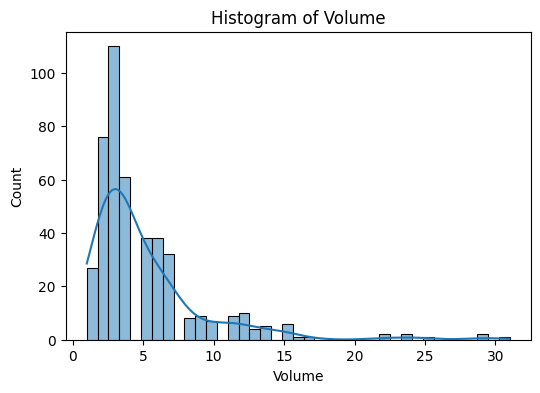

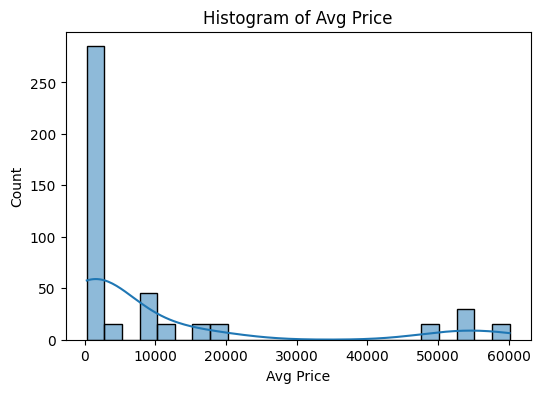

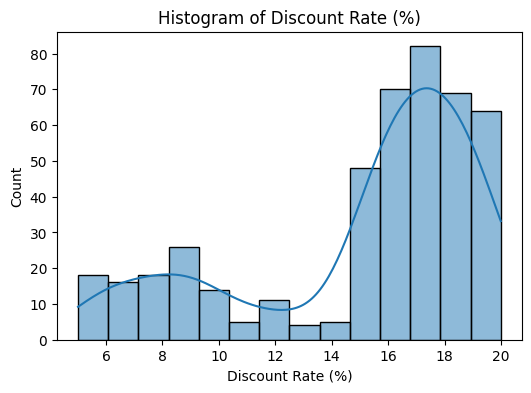

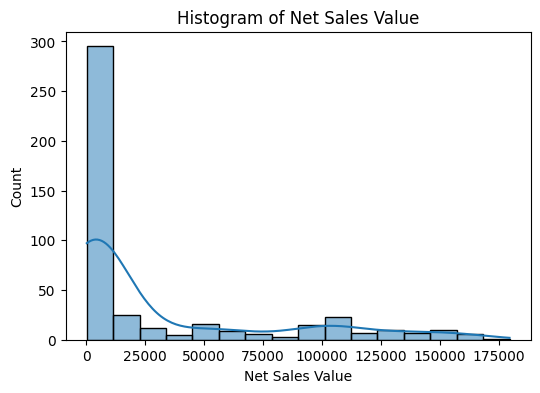

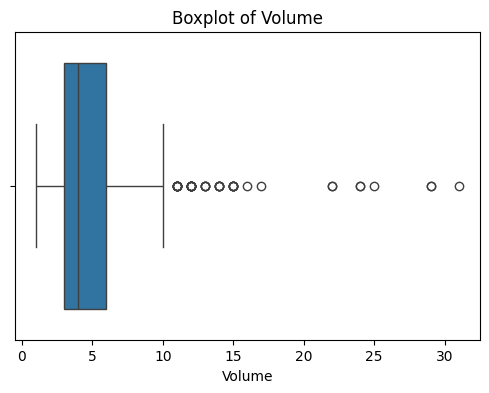

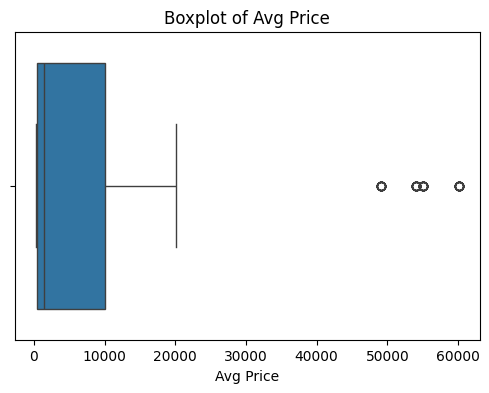

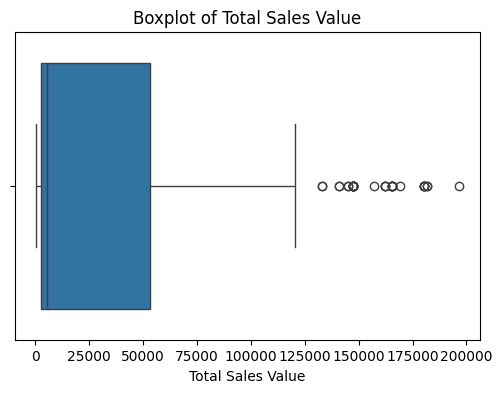

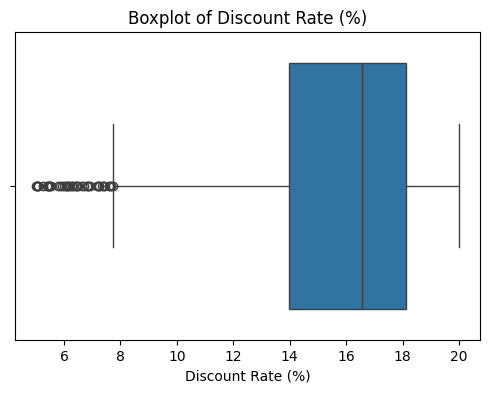

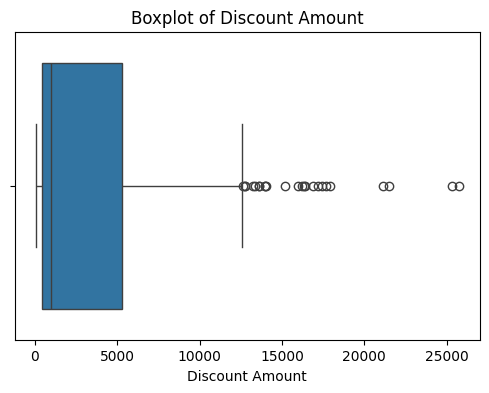

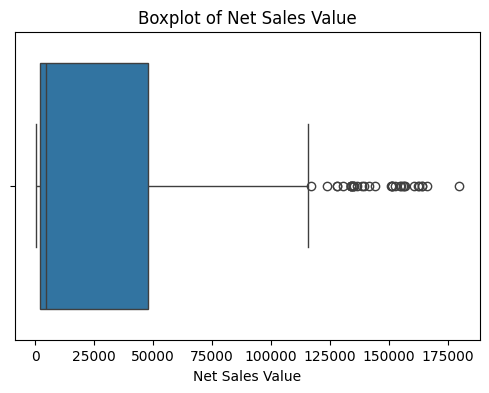

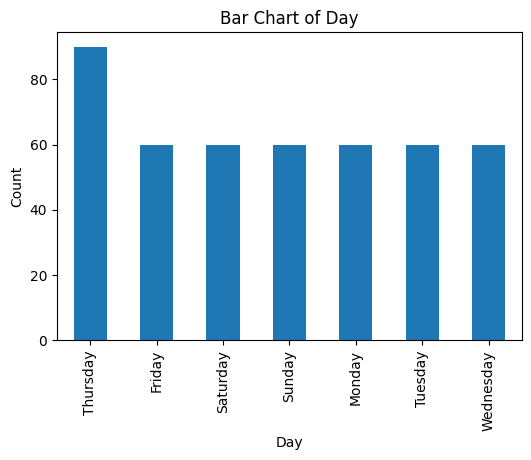

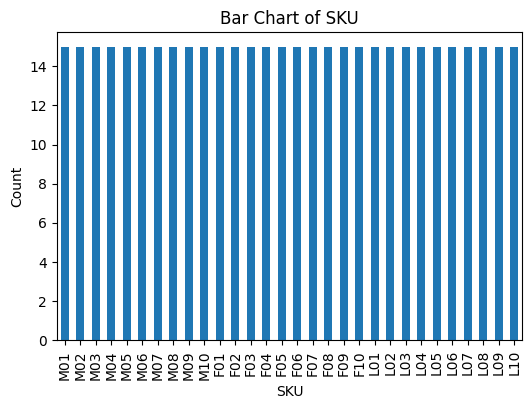

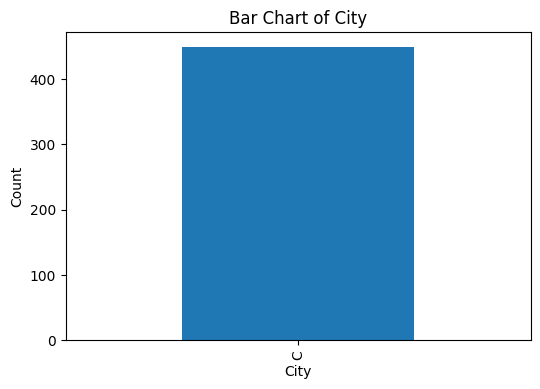

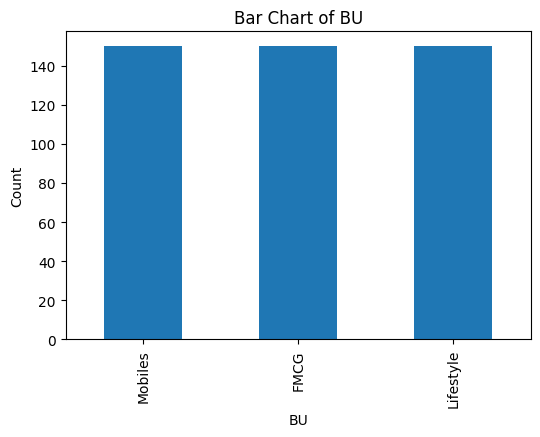

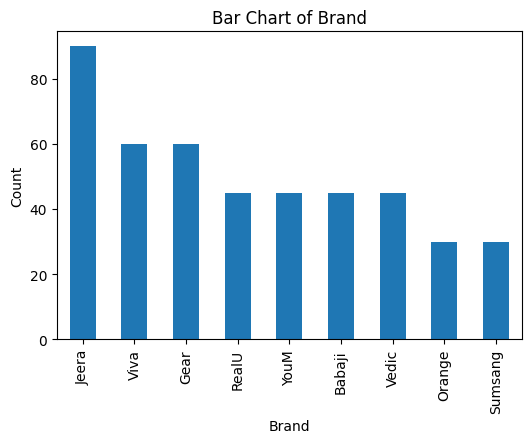

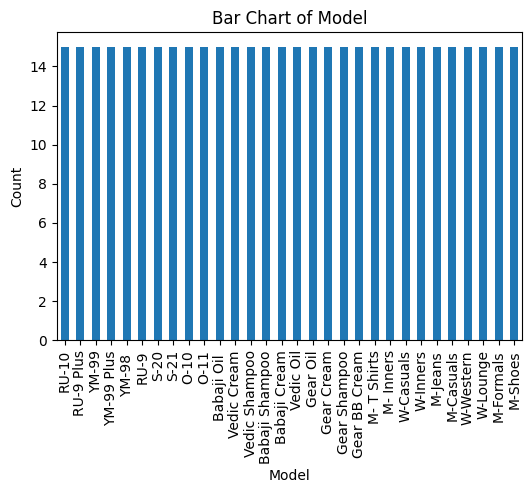

In [10]:
# 2. Data Visualization
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Box Plots
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Bar Charts for Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.ylabel('Count')
    plt.show()

In [12]:
# 3. Standardization of Numerical Variables (Z-score)
df_standardized = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_standardized[col] = (df[col] - mean) / std

print("\nStandardized Numerical Columns (first 5 rows):\n", df_standardized[numerical_cols].head())




Standardized Numerical Columns (first 5 rows):
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [13]:
# 4. One-hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nEncoded DataFrame (first 5 rows):\n", df_encoded.head())



Encoded DataFrame (first 5 rows):
         Date  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0 2021-04-01      15      12100             181500          11.654820   
1 2021-04-01      10      10100             101000          11.560498   
2 2021-04-01       7      16100             112700           9.456886   
3 2021-04-01       6      20100             120600           6.935385   
4 2021-04-01       3       8100              24300          17.995663   

   Discount Amount  Net Sales Value  Day_Monday  Day_Saturday  Day_Sunday  \
0     21153.498820    160346.501180       False         False       False   
1     11676.102961     89323.897039       False         False       False   
2     10657.910157    102042.089843       False         False       False   
3      8364.074702    112235.925298       False         False       False   
4      4372.946230     19927.053770       False         False       False   

   ...  Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampo

In [14]:
# === TASK 2: One-Sample T-Test ===
battery_lives = [5.1, 4.9, 5.3, 5.0, 4.7, 5.2, 4.8, 5.1, 5.0, 4.9, 5.2, 4.6]
claimed_mean = 5.5
sample_mean = np.mean(battery_lives)
sample_std = np.std(battery_lives, ddof=1)
n = len(battery_lives)
t_statistic = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

# Critical value for one-tailed t-test at alpha=0.05, df=11
t_critical = stats.t.ppf(0.05, df=n-1)

print(f"\nOne-Sample T-Test:")
print(f"Sample Mean = {sample_mean:.2f}")
print(f"T-Statistic = {t_statistic:.4f}")
print(f"Critical T-Value = {t_critical:.4f}")

# Decision
if t_statistic < t_critical:
    print("Reject the null hypothesis: Evidence supports the analyst’s claim.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence against the claim.")



One-Sample T-Test:
Sample Mean = 4.98
T-Statistic = -8.4230
Critical T-Value = -1.7959
Reject the null hypothesis: Evidence supports the analyst’s claim.


#DATA SCIENCE JOB SIMULATON 2

In [16]:
import numpy as np
from scipy.stats import ttest_rel

# Typing speed data before and after training
before_training = np.array([52, 47, 58, 43, 50, 46, 49, 53, 48, 51])
after_training = np.array([56, 50, 60, 45, 54, 48, 53, 56, 51, 55])

# Compute the differences
differences = before_training - after_training
mean_difference = np.mean(differences)

# Perform two-tailed paired t-test
t_statistic, p_value_two_tailed = ttest_rel(before_training, after_training)

# Convert to one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2

# Output results
print(f"Mean difference (Before - After): {mean_difference:.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

# Hypothesis testing decision at α = 0.05
alpha = 0.05
if p_value_one_tailed < alpha and mean_difference < 0:
    print("Reject the null hypothesis: Training significantly improved typing speed.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that training improved speed.")


Mean difference (Before - After): -3.10
T-statistic: -11.1959
One-tailed p-value: 0.0000
Reject the null hypothesis: Training significantly improved typing speed.
